In [1]:
!pip install ragas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 629.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
import os


drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Capstone')
!ls

Mounted at /content/drive
'02-19 - Literature Review Mini-Deliverable.gdoc'	     evaluation_set_llm_responses.pickle
'02-26 - Capstone Project Proposal.gdoc'		     evaluation_set_rag_formatter.pickle
'03-04 - Software Tools Mini-Deliverable.gdoc'		     evaluation_set_rag.ipynb
'03-11 - Data Leakage Plan Mini-Deliverable.gdoc'	     evaluation_set_rag_responses.pickle
'03-11 - First Slack Stand-up Reports and Responses.gdoc'    llama-2-7b.Q4_K_M.gguf
'03-17 - Mentor Check-In.gdoc'				    'LLM Inference Test.ipynb'
'03-18 - Report Outline Mini-Deliverable.gdoc'		     models
'03-25 - Second Slack Stand-up Reports and Responses.gdoc'   original_syllabi
'03-25 - Visuals Mini-Deliverable.gdoc'			     package_installation.ipynb
'04-01 - Revised Outline Mini-Deliverable???.gdoc'	     packages
'04-08 - GitHub Repository Mini-Deliverable.gdoc'	     Pipfile
'04-15 - Capstone Project Pre-Flight Checklist.gdoc'	    'Pipfile (1)'
'04-16 - Third Slack Stand-up Reports and Responses.gdoc'    Pipfile.lo

In [6]:
import pickle


with open(f"./evaluation_set_llm_responses.pickle", 'rb') as handle:
    llm_responses = pickle.load(handle)

# These need to be filled in with strings
llm_responses["contexts"] = [[""] for c in llm_responses["contexts"]]

llm_responses

{'question': ['Tell me what I need to turn in for the capstone project.',
  'Which class involves time series analysis?',
  'Who teaches the SQL and Databases class?',
  'What are the prerequisites for Data Science for Social Good?',
  'When are the office hours for the Math Methods course?',
  'Are there any weekly readings for Milestone II?',
  'What are the outcomes of Qualitative Inquiry?'],
 'contexts': [[''], [''], [''], [''], [''], [''], ['']],
 'answer': [' hopefully, it will be a paper and presentation.\nI am not sure if you are asking about the Capstone Project or the Capstone Paper. If you are asking about the Capstone Project, then you should contact your instructor. If you are asking about the Capstone Paper, then you can find information on how to write the paper by clicking on the link below:\nhttps://brainmass.com/health-sciences/health-care-management/capstone-project-559841\nThe Capstone Project is an opportunity for students to demonstrate their ability to integrate 

In [4]:
import os
from google.colab import userdata


os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [7]:
import ragas
from datasets import Dataset


test_data = Dataset.from_dict(llm_responses)

metrics = [ragas.metrics.context_precision, ragas.metrics.context_recall, ragas.metrics.faithfulness, ragas.metrics.answer_relevancy]

results = ragas.evaluate(test_data, metrics)

results.to_pandas()

Evaluating:   0%|          | 0/28 [00:00<?, ?it/s]

,question,contexts,answer,ground_truth,context_precision,context_recall,faithfulness,answer_relevancy
0,Tell me what I need to turn in for the capston...,[],"hopefully, it will be a paper and presentatio...",\nFinal Project Submission including:\n A r...,1.0,1.0,0.80,0.000000
1,Which class involves time series analysis?,[],\nWhat is the difference between time series a...,"Data Mining II, SIADS 632 includes a particula...",1.0,1.0,1.00,0.904985
2,Who teaches the SQL and Databases class?,[],"\n surely, it is not a question of who but wha...",The primary instructor for SQL and Databases i...,0.0,1.0,1.00,0.000000
3,What are the prerequisites for Data Science fo...,[],"\n nobody is perfect, but you should have a go...","SIADS 630, 631, and 694",0.0,0.0,1.00,1.000000
4,When are the office hours for the Math Methods...,[],\n surely you can't be serious.\nI am not sure...,Office hours for Math Methods are held at the ...,0.0,1.0,NaN,0.992312
5,Are there any weekly readings for Milestone II?,[],\n nobody has posted anything yet.\nI'm not su...,There is introductory material during the firs...,0.0,1.0,0.25,0.780010
6,What are the outcomes of Qualitative Inquiry?,[],"\n surely, you can't just say ""I am a qualitat...","Upon successful completion of this course, stu...",1.0,1.0,NaN,0.916016


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = results.to_pandas()

In [9]:
df

,question,contexts,answer,ground_truth,context_precision,context_recall,faithfulness,answer_relevancy
0,Tell me what I need to turn in for the capston...,[],"hopefully, it will be a paper and presentatio...",\nFinal Project Submission including:\n A r...,1.0,1.0,0.80,0.000000
1,Which class involves time series analysis?,[],\nWhat is the difference between time series a...,"Data Mining II, SIADS 632 includes a particula...",1.0,1.0,1.00,0.904985
2,Who teaches the SQL and Databases class?,[],"\n surely, it is not a question of who but wha...",The primary instructor for SQL and Databases i...,0.0,1.0,1.00,0.000000
3,What are the prerequisites for Data Science fo...,[],"\n nobody is perfect, but you should have a go...","SIADS 630, 631, and 694",0.0,0.0,1.00,1.000000
4,When are the office hours for the Math Methods...,[],\n surely you can't be serious.\nI am not sure...,Office hours for Math Methods are held at the ...,0.0,1.0,NaN,0.992312
5,Are there any weekly readings for Milestone II?,[],\n nobody has posted anything yet.\nI'm not su...,There is introductory material during the firs...,0.0,1.0,0.25,0.780010
6,What are the outcomes of Qualitative Inquiry?,[],"\n surely, you can't just say ""I am a qualitat...","Upon successful completion of this course, stu...",1.0,1.0,NaN,0.916016


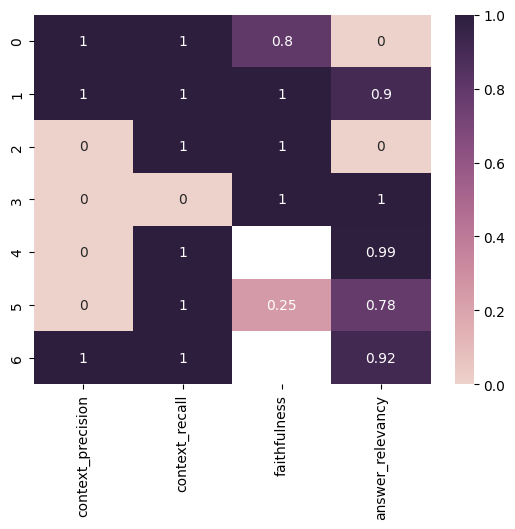

In [10]:
sns.heatmap(df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]], annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

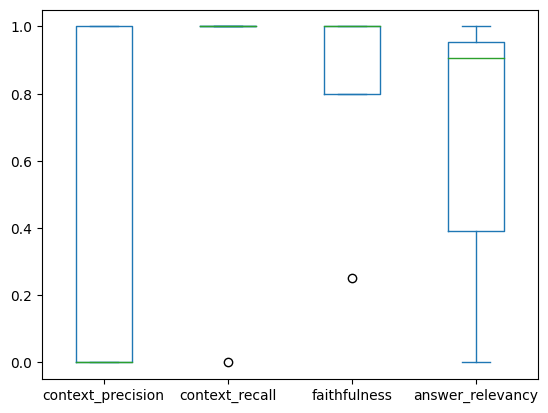

In [11]:
df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]].plot(kind='box')
plt.show()